In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from GPs.Kernel import Kernel, SqExp, RQ, ExpSine, WhiteNoise
from GPs.GP import GPR

%matplotlib inline

# Initialize

## Define the Training Data Set
Define the training dataset for the independent and dependent variables

In [2]:
x = np.random.RandomState(0).uniform(-5, 5, 20)
#x = np.random.uniform(-5, 5, 20)
y = x*np.sin(x)
#y += np.random.normal(0,0.5,y.size)
y += np.random.RandomState(34).normal(0,0.5,y.size)

## Define the Test Set
Define the training dataset for the independent variables. In this case it is a "continuous" curve

In [3]:
x_star = np.linspace(-5,5,500)

## Train the Model

Instantiate the kernels, instantiate the GPR with the kernel, and train the model.

In [4]:
#Define the basic kernels
k1 = SqExp(0.45,2)
k2 = RQ(0.5,2,3)
k3 = ExpSine(0.1,2,30)
k4 = WhiteNoise(0.01)

#Define the combined kernel
k1 = k1+k4

In [5]:
#Instantiate the GP predictor object with the desired kernel
gp = GPR(k1)

#Train the model
gp.train(x,y)

# Regression

Perform the regression based on the set of training data. The best estimate of the prediction is given by the mean of the distribution from which the posterior samples are drawn.

## Predict (Initial Hyperparameters)

Perform regression using the initial user-specified hyperparameters.

In [6]:
#Predict a new set of test data given the independent variable observations
y_mean1,y_var1 = gp.predict(x_star,False)

#Convert the variance to the standard deviation
y_err1 = np.sqrt(y_var1)

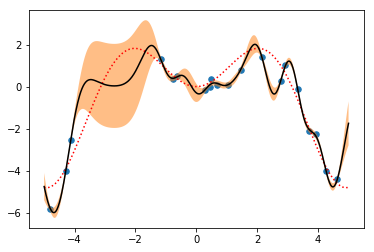

In [7]:
plt.scatter(x,y,s=30)
plt.plot(x_star,x_star*np.sin(x_star),'r:')
plt.plot(x_star,y_mean1,'k-')
plt.fill_between(x_star,y_mean1+y_err1,y_mean1-y_err1,alpha=0.5)

# Optimize Hyperparameters

Optimize over the hyperparameters.

In [8]:
gp.optimize('SLSQP')

     fun: 15.965549174816681
     jac: array([ -2.24947929e-04,   5.00679016e-06,  -3.88514996e-03])
 message: 'Optimization terminated successfully.'
    nfev: 145
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([ 1.80397587,  4.86011667,  0.18058626])

array([ 1.47895967,  3.99711988,  0.16295754])

array([ 1.80397587,  4.86011667,  0.18058626])

## Predict (Optimized Hyperparameters)

Perform the regression from the hyperparameters that optimize the log marginal likelihood. Note the improvement in the fit in comparison to the actual function (red dotted line).

In [9]:
#Predict a new set of test data given the independent variable observations
y_mean2,y_var2 = gp.predict(x_star,False)

#Convert the variance to the standard deviation
y_err2 = np.sqrt(y_var2)

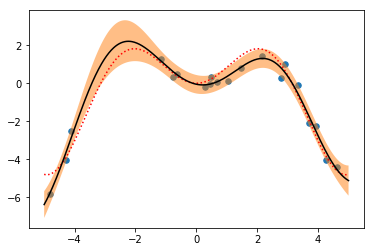

In [10]:
plt.scatter(x,y,s=30)
plt.plot(x_star,x_star*np.sin(x_star),'r:')
plt.plot(x_star,y_mean2,'k-')
plt.fill_between(x_star,y_mean2+y_err2,y_mean2-y_err2,alpha=0.5)